# Boundary Hydrodynamics

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:
    style = json.load(fp)
    
plt.rcParams.update(style) 

As another important example of hydrodynamical flow fields we would like to have a look at hydrodynamic flows that arise from interfacial forces. In most of the cases, these interfacial forces are often caused by osmotic pressure differences an are termed osmotic flows. The osmotic pressure difference may thereby arise from various properties, e.g. temperature gradients, electrostatic potential gradients, concentration gradients.  

To analyze this type of boundary flow, we first look at the geometry below.


![Boundary Flow](img/boundary_flow.png)

The boundary flows are the results of the fact that the interaction between liquid molecules is altered by the presence of the substrate depicted below (some symmetry breaking). This altered interaction is present at a length scale of nanometers (!) only. Think for example about the influence of van der Waals forces or the electric double layer. Beyond this interfacial region of a few nanometers the influence of the solid surface has decayed and the liquid exhibits bulk-like properties. It is this tiny interfacial region which we will consider in the description below.

According to the above picture, we can use the Stokes equation 

\begin{equation}
\eta \Delta \vec{u}= -\nabla p-\vec{f}
\end{equation}

and split it according to the $x$ (tangential) and $z$ (nromal) components.

<div style="-webkit-column-count: 2; -moz-column-count: 2; column-count: 2; -webkit-column-rule: 1px dotted #e0e0e0; -moz-column-rule: 1px dotted #e0e0e0; column-rule: 1px dotted #e0e0e0;">
    <div style="display: inline-block; width: 50%">
        <h4>normal to surface</h4>
        $\frac{\partial^2 \vec{u}}{\partial z^2}=0$
        <p>
        $0=\frac{\partial p}{\partial z}-f_z$
    </div>
    <div style="display: inline-block;">
        <h4>tangential to surface</h4>
        $\eta \frac{\partial^2 \vec{u}}{\partial z^2}=\frac{\partial p}{\partial x}-f_x$
    </div>
</div>

We assume that close to the boundary there will be no flow component normal to the surface, which simplifies the normal components of the Stokes equation into a balance of pressure gradient (presumably osmotic pressure) and normal force density.

For the tangential component we have a tangential pressure gradient (osmotic) and a tangential force density which determine the flow. 


We can now integrate the equation for the tangential component by parts  with two boundary conditions, i.e. $u(z=0)=0$ and $u(z\gg\lambda)=u_B={\rm const.}$ and find

\begin{equation}
u_B=\frac{1}{\eta}\int_0^{\infty} z\left (f_x-\frac{dp}{dx}\right )dz
\end{equation}

for the value of the boundary velocity $u_B$, which is established rounghly at a distance $\lambda$ from the interface. Note that this upper boundary condition says that there is no solid boundary (with no-slip boundary condition) at infinity. We can introduce the boundary condition at large distance later.  The question is now what in detail the term in the brackets of the previous equation is.

## Thermo-osmosis

We want to evaluate the boundary flow for the case when the surface is charged and in contact with an electrolyte solution. In this case, we can refer to the Debye-Hückel theory, which we earlier developed. In addition, this double layer is subject to a temperature gradient tangential to the surface, which will be the source of the osmotic pressure gradient along the surface. 

![DoubleLayer](img/charged_surface.png)

For this situation we have all equations at hand.
We have first of all

- excess charge density: $\rho = e (n_+-n_-)$
- total ion density: $n=n_++n_-$
- the ion density distribution: $n_{\pm}=n_0(\exp\left (\mp \frac{e\psi}{k_B T}\right )-1)$
- $n_0$ the bulk ion density
- $\psi$ the electrostatic potential

The force density in the system is given by

\begin{equation}
f=-\rho \nabla \psi + \ldots
\end{equation}

where the dots denote other terms (electrostriction, change of dielectric constant ...), which exist, but which we neglect.

Further, we can write the pressure as the osmotic pressure of the ion density 

\begin{equation}
p=n k_B T=(n_++n_-)k_B T=\left ( n_0(\exp\left (- \frac{e\psi}{k_B T}\right )-1)+ n_0(\exp\left ( \frac{e\psi}{k_B T}\right )-1) \right ) k_B T
\end{equation}

The task is now to calculate the term $f_x-\frac{\partial p}{\partial x}$ using derivatives of the above written pressure. Note that we have to take the derivative of the temperature with respect to the position but assume the temperature in the Boltzmann factors constant.

The result of this a bit more lengthy calculation is that

\begin{equation}
f_x-\frac{\partial p}{\partial x} =-nk_B T \frac{1}{T}\frac{\partial T}{\partial x} - \rho \psi \frac{1}{T}\frac{\partial T}{\partial x}
\end{equation}

or in 3-dimensions 

\begin{equation}
{\bf f}-\nabla p= -\left(\varrho \psi+n k_{\mathrm{B}} T\right) \frac{\nabla T}{T}
\end{equation}

The term in fron of the fraction is an electrostatic interaction energy related term and a term corresponding to the ideal gas pressure. Both terms together clearly make up an enthalpy (energy + pressure x volume). In this case, they correspond to an excess enthalpy density as there is no contribution if there is no electrostatic surface charge involved.

We can therefore also write the boundary velocity $u_B$ as

\begin{equation}
u_B= -\frac{1}{\eta}\int_0^{\infty} z h(z)dz\frac{\nabla T_{||}}{T}
\end{equation}

where $h(z)$ is the excess enthalpy density of the interaction of the liquid with the solid as compared to the liquid alone. As the interaction between liquid and solid is often attractive (van der Waals alone already is attractive), the excess enthalpy density is negative and the difference of force density and pressure density results in forces along the temperarture gradient, e.g. from the cold region to the hot region. If the excess enthalpy is positive, the flow is driven from hot to cold regions. Note that this flow is established in a thin liquid layer of thickness $\lambda$, which is only a few nanometers thin. Within these few nanometers the flow velocity rises from 0 to a few 10 $\mu m/s$. 

The plot below calculates the integral over the product of $z$ and the excess enthalpy for the electric double layer, assuming that some of the constants are 1 and the temperature gradient just gives a minus sign (assuming hot is on the left and cold is on the right).

In [62]:
## electrostatic potential
def psi(z,lam_D):
    return(np.exp(-z/lam_D))

In [63]:
## n+
def npl(z,lam_D,n):
    return(n*(np.exp(-psi(z,lam_D))-1))

## n-    
def nmi(z,lam_D,n):
    return(n*(np.exp(psi(z,lam_D))-1))    

In [64]:
## total n
def nt(z,lam_D,n):
    return(2*n*(np.cosh(psi(z,lam_D))-1))    

In [65]:
## excess enhalpy 

def h(z,lam_D,n):
    return((npl(z,lam_D,1)-nmi(z,lam_D,1))*psi(z,lam_D)+nt(z,lam_D,1))

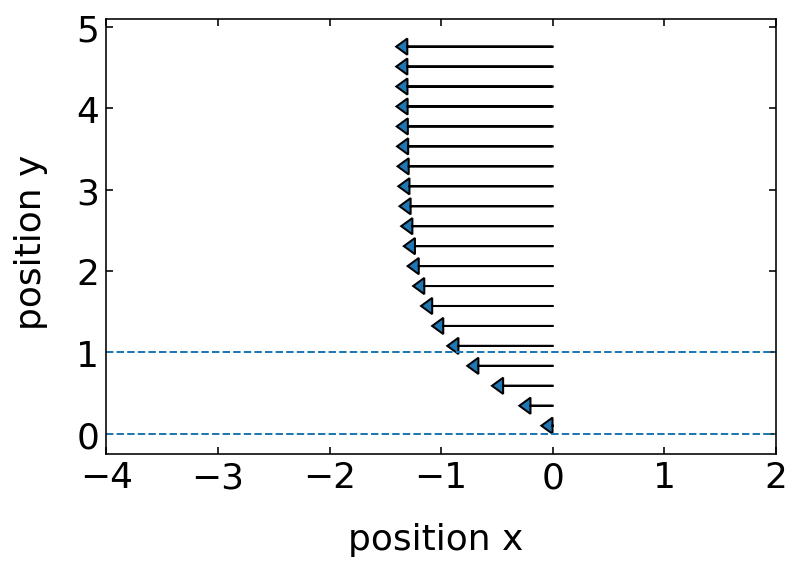

In [61]:
plt.figure(figsize=(6,4))
plt.axhline(y=0,linestyle="--")
plt.axhline(y=1,linestyle="--")
z=np.linspace(0.1,5,1000)b
inth=-np.cumsum(z*(h(z,1,1))*(z[1]-z[0])) ## numerically integrate the excess enthalpy *z
[plt.arrow(0,z[l],-inth[l]*5,0,head_width=0.2,head_length=0.1) for l in range(0,len(z),50)]
plt.xlim(-4,2)
plt.xlabel("position x ")
plt.ylabel("position y ")
plt.show()

The flow profile we have calculated saturates at the boundary velocity $u_B$ as we have assumed this as the boundary condition at infinite distance. If there is a second surface at some distance, even though at finite distance but still large as compared to the interaction range, the velocity magnitude has to decay to zero towards this surface. Instead of assuming the complicated flow profile as depicted below, we can in cases where all other distances are large as compared to the interaction range $\lambda_D$ assume that the velocity directly at the interface is $u_B$. The hydrodynamic boundary condition is thus altered from a **no-slip boundary condition** to a **slip boundary condition** with the slip velocity $u_B$.